In [1]:
import otter
# nb_name should be the name of your notebook without the .ipynb extension
nb_name = "p12"
py_filename = nb_name + ".py"
grader = otter.Notebook(nb_name + ".ipynb")

In [2]:
import p12_test

In [3]:
# PLEASE FILL IN THE DETAILS
# Enter none if you don't have a project partner
# You will have to add your partner as a group member on Gradescope even after you fill this

# project: p12
# submitter: abrajanrojas
# partner: tlxiong

# Project 12: World University Rankings

## Learning Objectives:

In this project, you will demonstrate your ability to

* read and write files,
* create and use `Pandas DataFrames`,
* use `BeautifulSoup` to parse web pages.

Please go through [lab-p12](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/tree/main/lab-p12) before working on this project. The lab introduces some useful techniques related to this project.

## Note on Academic Misconduct:

**IMPORTANT**: p12 and p13 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partner up with someone for p12, you have to sustain that partnership until the end of p13. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f22/syllabus.html).

## Testing your code:

Along with this notebook, you must have downloaded the file `p12_test.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

For answers involving DataFrames, `p12_test.py` compares your tables to those in `p12_expected.html`, so take a moment to open that file on a web browser (from Finder/Explorer).

`p12_test.py` doesn't care if you have extra rows or columns, and it doesn't care about the order of the rows or columns. However, you must have the correct values at each index/column location shown in `p12_expected.html`.

## Introduction:

For this project, you're going to analyze World University Rankings!

Specifically, you're going to use Pandas to analyze various statistics of the top ranked universities across the world, over the last three years.

Start by downloading the files `p12_test.py`, and `p12_expected.html`.

**Important Warning:** Do **not** download any of the other files manually (you **must** write Python code to download these automatically, as in lab-p12). When we run the autograder, the other files such as `rankings.json`, `2019-2020.html`, `2020-2021.html`, `2021-2022.html` will **not** be in the directory. So, unless your `p12.ipynb` downloads these files, you will get a **zero score** on the project. More details can be found in the **Setup** section of the project.

## Data:

For this project, we will be analyzing statistics about world university rankings adapted from [here](https://cwur.org/). These are the specific webpages that we extracted the data from:

* https://cwur.org/2019-20.php
* https://cwur.org/2020-21.php
* https://cwur.org/2021-22.php

Later in the project, you will be scraping these webpages and extracting the data yourself. Since we don't want all of you bombarding these webpages with requests, we have made snapshots of these webpages, and hosted them on GitHub. You can find the snapshots here:

* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2019-2020.html
* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2020-2021.html
* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2021-2022.html

You will be extracting the data from these three html pages and analyzing them. However, to make the start of the project a little easier, we have already parsed the files for you! We have gathered the data from these html files, and collected them in a single json file, which can be found here:

* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/rankings.json

You will work with this json file for most of this project. At the end of this project, you will generate an identical json file by parsing the html files yourself.

## Project Requirements:

You **may not** hardcode indices in your code. You **may not** manually download **any** files for this project, unless you are **explicitly** told to do so. For all other files, you **must** use the `download` function to download the files.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Functions:
- `download`
- `parse_html`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Data Structures:
- `institutions_df`

In addition, you are also **required** to follow the requirements below:
* **Avoid using loops to iterate over pandas dataframes and instead use boolean indexing.**
* Do **not** use `loc` to look up data in **DataFrames** or **Series**. You are **allowed** to use `iloc`.
* Do **not** use **absolute** paths such as `C://ms//cs220//p12`. You may **only** use **relative paths**.
* Do **not** use meaningless names for variables or functions (e.g. `uuu = "my name"`).
* Do **not** leave irrelevant output or test code that we didn't ask for.
* Do **not** write the exact same code in multiple places. Instead, wrap this code into a function and call that function whenever the code should be used.
* Do **not** call unnecessary functions.
* **Avoid** calling **slow** functions multiple times within a loop.
* **Avoid** inappropriate use of data structures. For instance: do **not** use a `for` loop to search for a corresponding value in a dictionary with a given key; instead use `dictname[key]` directly.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/blob/main/p12/rubric.md).

# Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import requests
import os
import json
import pandas as pd
from pandas import Series, DataFrame
from bs4 import BeautifulSoup

### Function 1: `download(page, filename)`

You **must** now copy/paste the `download` function from lab-p12. This function **must** extract the data in the webpage `page` and store it in `filename`. If the `filename` already exists, it **must not** download the file again.

In [5]:
# copy/paste the 'download' function from lab-p12
def download(filename, url):

    if os.path.exists(filename):
        return filename + " already exists!"
    
    r = requests.get(url)
    r.raise_for_status()
    f = open(filename,"w", encoding="utf-8")
    f.write(r.text)
    f.close()

    return (str(filename) + " created!")

Now, use `download` to pull the data from here (**do not manually download**): https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/rankings.json and store it in the file `rankings.json`. Once you have created the file, create a Dataframe `rankings` from this file.

**Warning:** Make sure your `download` function meets the specifications mentioned in lab-p12 and does **not** download the file if it already exists. The TAs will **manually deduct** points otherwise. Make sure you use the `download` function to pull the data instead of manually downloading the files. Otherwise you will get a zero.

In [6]:
download('rankings.json', 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/rankings.json')

'rankings.json created!'

In [7]:
# open 'rankings.json' with pd.read_json('rankings.json') and store in the variable 'rankings'
rankings = pd.read_json('rankings.json')

**Question 1:** How **many** countries do we have in our dataset?

Your output **must** be an **int** representing the number of *unique* countries in the dataset.

In [8]:
# compute and store the answer in the variable 'num_countries', then display it
countries = pd.Series(rankings.iloc[:]["Country"])
countries_list = set(countries)
num_countries = len(countries_list)
num_countries

103

In [9]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** Generate a `pandas` **DataFrame** containing **all** the statistics of the **highest-ranked** institution based on `World Rank` across all the years.

Your output **must** be a pandas **DataFrame** with 3 rows and 10 columns. It **must** contain all the data for the institutions with `World Rank` of *1*. It **must** look like this:

<div>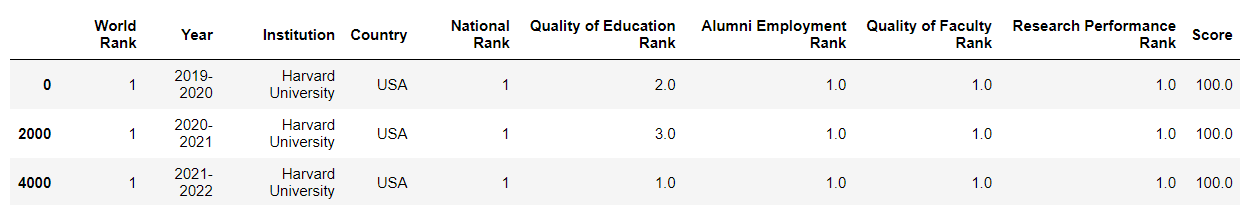</div>

In [10]:
# compute and store the answer in the variable 'highest_ranked', then display it
highest_ranked = rankings.sort_values(by = ['World Rank', 'Year'])
highest_ranked = highest_ranked[:3]
highest_ranked

World Rank       Year         Institution Country  National Rank  \
0              1  2019-2020  Harvard University     USA              1   
2000           1  2020-2021  Harvard University     USA              1   
4000           1  2021-2022  Harvard University     USA              1   

      Quality of Education Rank  Alumni Employment Rank  \
0                           2.0                     1.0   
2000                        3.0                     1.0   
4000                        1.0                     1.0   

      Quality of Faculty Rank  Research Performance Rank  Score  
0                         1.0                        1.0  100.0  
2000                      1.0                        1.0  100.0  
4000                      1.0                        1.0  100.0

In [11]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3:** Generate a `pandas` **DataFrame** containing **all** the statistics of *University of Wisconsin–Madison*.

Your output **must** be a pandas **DataFrame** with 3 rows and 10 columns. It **must** look like this:

<div>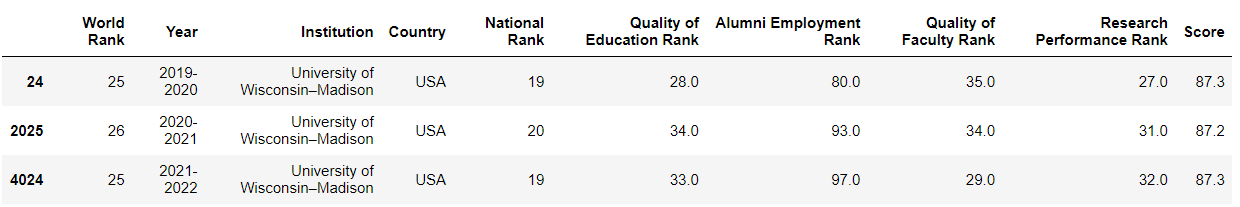</div>

In [12]:
# compute and store the answer in the variable 'uw_madison', then display it
uw_madison = rankings[rankings['Institution'] == "University of Wisconsin–Madison"]
uw_madison

World Rank       Year                      Institution Country  \
24            25  2019-2020  University of Wisconsin–Madison     USA   
2025          26  2020-2021  University of Wisconsin–Madison     USA   
4024          25  2021-2022  University of Wisconsin–Madison     USA   

      National Rank  Quality of Education Rank  Alumni Employment Rank  \
24               19                       28.0                    80.0   
2025             20                       34.0                    93.0   
4024             19                       33.0                    97.0   

      Quality of Faculty Rank  Research Performance Rank  Score  
24                       35.0                       27.0   87.3  
2025                     34.0                       31.0   87.2  
4024                     29.0                       32.0   87.3

In [13]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** What is the `National Rank` of the *University of Wisconsin–Madison* in the `Year` *2021-2022*?

Your output **must** be an **int**. You **must** use **Boolean indexing** on the variable `uw_madison` to answer this question.

**Hint:** Use Boolean indexing on the DataFrame `uw_madison` to find the data for the year `2021-2022`. You may then extract the `National Rank` column from the subset DataFrame. Finally, use `iloc` to lookup the value in the DataFrame which contains only one row and one column.

In [14]:
# compute and store the answer in the variable 'uw_madison_nat_rank', then display it
uw_madison_nat_rank = uw_madison["National Rank"].iloc[0]
uw_madison_nat_rank

19

In [15]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5:** What is the **average** `Score` of the *University of Wisconsin–Madison*?

Your output **must** be a **float**. You **must** use the variable `uw_madison` to answer this question.

**Hint:** You **must** extract the `Score` column of the **DataFrame** `uw_madison` as a **Series**. You can find the **average** of  all the scores in a **Series** with the `Series.mean` function.

In [16]:
# compute and store the answer in the variable 'uw_madison_avg_score', then display it
uw_madison_avg_score = uw_madison["Score"].mean()
uw_madison_avg_score


87.26666666666667

In [17]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6:** Generate a `pandas` **DataFrame** containing **all** the statistics of universities from the `Country` *Singapore* in the `Year` *2020-2021*.

Your output **must** be a pandas **DataFrame** with 4 rows and 10 columns. It **must** look like this:

<div>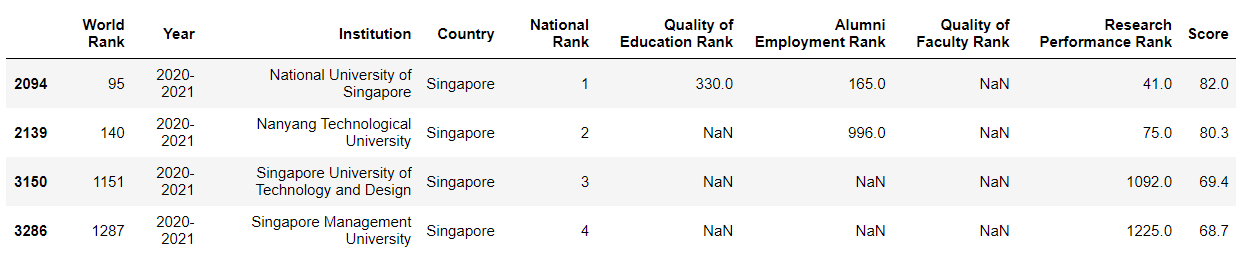</div>

**Hint:** When there are **multiple** conditions to filter a **DataFrame**, you can combine all the conditions with `&` as a logical operator between them. For example, you can extract the data for all the institutions with `Quality of Education Rank <= 10` and `Quality of Faculty Rank <= 10` with:

```python
rankings[(rankings["Quality of Education Rank"] <= 10) & (rankings["Quality of Faculty Rank"] <= 10)]
```

In [18]:
# compute and store the answer in the variable 'singapore_inst', then display it
singapore_inst = rankings[(rankings["Country"] == 'Singapore') & (rankings["Year"] == "2020-2021")]
singapore_inst

World Rank       Year                                    Institution  \
2094          95  2020-2021               National University of Singapore   
2139         140  2020-2021               Nanyang Technological University   
3150        1151  2020-2021  Singapore University of Technology and Design   
3286        1287  2020-2021                Singapore Management University   

        Country  National Rank  Quality of Education Rank  \
2094  Singapore              1                      330.0   
2139  Singapore              2                        NaN   
3150  Singapore              3                        NaN   
3286  Singapore              4                        NaN   

      Alumni Employment Rank  Quality of Faculty Rank  \
2094                   165.0                      NaN   
2139                   996.0                      NaN   
3150                     NaN                      NaN   
3286                     NaN                      NaN   

      Research Performance Rank  Score  
2094                       41.0   82.0  
2139                       75.0   80.3  
3150                     1092.0   69.4  
3286                     1225.0   68.7

In [19]:
grader.check("q6")

q6 results: All test cases passed!

**Question 7:** In the `Year` *2019-2020*, what was the **highest-ranked** institution in the `Country` *Germany*?

Your output **must** be a **string** representing the **name** of this institution.

**Hint:** The highest-ranked institution in *Germany* is the institution from Germany with a `National Rank` of *1*.

In [20]:
# compute and store the answer in the variable 'german_best_name', then display it
germany = rankings[(rankings["Country"] == "Germany") & (rankings['World Rank']) & (rankings['Year'] == '2019-2020')]
german_best_name = germany['Institution'].iloc[0]
german_best_name

'Ludwig Maximilian University of Munich'

In [21]:
germany

World Rank       Year                                Institution  \
50            51  2019-2020     Ludwig Maximilian University of Munich   
70            71  2019-2020                  Free University of Berlin   
100          101  2019-2020              Humboldt University of Berlin   
134          135  2019-2020                         University of Bonn   
154          155  2019-2020                Goethe University Frankfurt   
208          209  2019-2020                                 TU Dresden   
218          219  2019-2020           University of Erlangen–Nuremberg   
220          221  2019-2020                      University of Münster   
226          227  2019-2020                     RWTH Aachen University   
234          235  2019-2020        Johannes Gutenberg University Mainz   
242          243  2019-2020                            Kiel University   
294          295  2019-2020               University of Duisburg-Essen   
300          301  2019-2020                     Ruhr University Bochum   
324          325  2019-2020         Friedrich Schiller University Jena   
362          363  2019-2020                    University of Stuttgart   
364          365  2019-2020             Technical University of Berlin   
424          425  2019-2020                      University of Marburg   
476          477  2019-2020  Martin Luther University Halle-Wittenberg   
492          493  2019-2020                Leibniz University Hannover   
500          501  2019-2020                       University of Bremen   
520          521  2019-2020           Technical University of Dortmund   
662          663  2019-2020     Otto von Guericke University Magdeburg   
684          685  2019-2020       Technical University of Braunschweig   
718          719  2019-2020                   University of Greifswald   
766          767  2019-2020                    University of Wuppertal   
826          827  2019-2020                          TU Kaiserslautern   
846          847  2019-2020                       University of Siegen   
978          979  2019-2020                     University of Mannheim   
992          993  2019-2020                       Paderborn University   
1006        1007  2019-2020                          Jacobs University   
1254        1255  2019-2020                                 TU Ilmenau   
1288        1289  2019-2020                 Witten/Herdecke University   
1364        1365  2019-2020           Hamburg University of Technology   
1474        1475  2019-2020                        University of Trier   
1510        1511  2019-2020            Leuphana University of Lüneburg   
1710        1711  2019-2020               University of Koblenz-Landau   

      Country  National Rank  Quality of Education Rank  \
50    Germany              1                       81.0   
70    Germany              2                      133.0   
100   Germany              5                      402.0   
134   Germany              8                      110.0   
154   Germany             10                      217.0   
208   Germany             12                        NaN   
218   Germany             14                      517.0   
220   Germany             15                      286.0   
226   Germany             16                      513.0   
234   Germany             18                        NaN   
242   Germany             20                      476.0   
294   Germany             21                        NaN   
300   Germany             22                        NaN   
324   Germany             25                        NaN   
362   Germany             28                       79.0   
364   Germany             30                      219.0   
424   Germany             32                      444.0   
476   Germany             34                      511.0   
492   Germany             35                        NaN   
500   Germany             37                        NaN   
520   Germany             39

In [22]:
grader.check("q7")

q7 results: All test cases passed!

**Question 8:** In the `Year` *2019-2020*, list **all** the institutions in the *USA* that were ranked **better** than the highest-ranked institution in *Germany*.

Your output **must** be a **list** containing the **names** of all universities from *USA* with a **better** `World Rank` than the institution `german_best_name` in the year 2019-2020. By **better** ranked, we refer to institutions with a **lower** value under the `World Rank` column.

**Hint:** You could store the entire row of the highest ranked institution from Germany in a different variable in q6, and use it to extract its `World Rank`.

In [23]:
# compute and store the answer in the variable 'us_better_than_german_best', then display it
german_rank = germany.iloc[0]["World Rank"]
german_rank
german_best = rankings[(rankings["Country"] == "USA") & (rankings["Year"] == "2019-2020") & (rankings["World Rank"] < german_rank)]
us_better_than_german_best = list(german_best['Institution'])
us_better_than_german_best
# us_better_than_german_best = []
# for idx in range(len(german_best)):
#     us_better_than_german_best.append(german_best.iloc[idx]["Institution"])
# us_better_than_german_best = list(set(us_better_than_german_best))
# us_better_than_german_best


['Harvard University',
 'Massachusetts Institute of Technology',
 'Stanford University',
 'Columbia University',
 'Princeton University',
 'University of California, Berkeley',
 'University of Pennsylvania',
 'University of Chicago',
 'California Institute of Technology',
 'Yale University',
 'Cornell University',
 'Northwestern University',
 'University of California, Los Angeles',
 'University of Michigan, Ann Arbor',
 'Johns Hopkins University',
 'University of Washington - Seattle',
 'University of Illinois at Urbana–Champaign',
 'Duke University',
 'University of Wisconsin–Madison',
 'New York University',
 'University of California San Diego',
 'University of Texas at Austin',
 'University of California, San Francisco',
 'University of North Carolina at Chapel Hill',
 'University of Minnesota - Twin Cities',
 'University of Texas Southwestern Medical Center',
 'Washington University in St. Louis',
 'University of Southern California',
 'Brown University',
 'Vanderbilt University'

In [24]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9:** What is the **highest-ranked** institution based on `Quality of Education Rank` in *China* for the `Year` *2021-2022*?

Your output **must** be a **string** representing the **name** of this institution. You may **assume** there is only one institution satisfying these requirements. By the **highest-ranked** institution, we refer to the institution with the **least** value under the `Quality of Education Rank` column.

**Hint:** You can find the **minimum** value in a **Series** with the `Series.min` method. You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html).

In [25]:
# compute and store the answer in the variable 'china_highest_qoe', then display it
china = rankings[(rankings['Country'] == 'China') & (rankings['Year'] == '2021-2022')]
china2 = china.sort_values(by = ["Quality of Education Rank"])
china_highest_qoe = china2['Institution'].iloc[0]
china_highest_qoe

'Fudan University'

In [26]:
grader.check("q9")

q9 results: All test cases passed!

**Question 10:** What are the **top** *five* **highest-ranked** institutions based on `Research Performance Rank` in *India* for the `Year` *2020-2021*?

Your output **must** be a **list** of institutions **sorted** in *increasing* order of their `Research Performance Rank`.

**Hint:** For sorting a DataFrame based on the values of a particular column, you can use the `DataFrame.sort_values(by="column_name")` method (where `column_name` is the column on which you want to sort). You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [27]:
# compute and store the answer in the variable 'india_highest_research', then display it
india_highest_research = []
india = rankings[(rankings['Country'] == 'India') & (rankings['Year'] =="2020-2021") & \
                 (rankings["Research Performance Rank"])]
india2 = india.sort_values(by = ['Research Performance Rank'], ascending = True)
india3 = india2['Institution'].iloc[0]
india4= india2['Institution'].iloc[1]
india5= india2['Institution'].iloc[2]
india6= india2['Institution'].iloc[3]
india7= india2['Institution'].iloc[4]
india_highest_research.append(india3)
india_highest_research.append(india4)
india_highest_research.append(india5)
india_highest_research.append(india6)
india_highest_research.append(india7)
india_highest_research

['Indian Institute of Science',
 'Tata Institute of Fundamental Research',
 'Indian Institute of Technology Bombay',
 'University of Delhi',
 'Indian Institute of Technology Madras']

In [28]:
grader.check("q10")

q10 results: All test cases passed!

For the next few questions, we will be analyzing how the rankings of the institutions change across the three years in the dataset. As you might have already noticed, the list of institutions in each year's rankings are different. As a result, for several institutions in the dataset, we do not have the rankings for all three years. Since it will be more challenging to analyze such institutions, we will simply skip them.

**Question 11:** How **many** institutions have rankings for **all** three years?

Your output **must** be an **integer**. To get started, you have been provided with a code snippet below.

**Hint:** You could make **sets** of the institutions that appear in each **DataFrame**, and find their **intersection**. Look up how to find the intersection of two or more sets in Python, on the internet!

In [29]:
# replace the ... with your code

year_2019_ranking_df = rankings[rankings["Year"] == "2019-2020"]
year_2020_ranking_df = rankings[rankings["Year"] == "2020-2021"]
year_2021_ranking_df = rankings[rankings["Year"] == "2021-2022"]

# TODO: make sets of the institutions in each of the three years
institutions_2019 = set(year_2019_ranking_df["Institution"])
institutions_2020 = set(year_2020_ranking_df["Institution"])
institutions_2021 = set(year_2021_ranking_df["Institution"])
# TODO: find the intersection of the three sets
institutions_2019_2020_2021 = list(set.intersection(institutions_2019, institutions_2020, institutions_2021))
# TODO: find the length of the intersection
num_institutions_2019_2020_2021 = len(institutions_2019_2020_2021)

num_institutions_2019_2020_2021
# TODO: make sets of the institutions in each of the three years
# TODO: find the length of the intersection of the three sets

1856

In [30]:
grader.check("q11")

q11 results: All test cases passed!

### Data Structure 1: `institutions_df`

You are now going to create a new **DataFrame** with a **unique** list of institutions which have featured in the rankings for **all** three years, along with their `World Ranking` across the three years. Specifically, the **DataFrame** would have the following four columns - `Institution`, `2019_ranking`, `2020_ranking`, and `2021_ranking`. To get started, you can use the following code snippet:

In [31]:
# define the variable 'institutions_df'

# TODO: initalize an empty list to store the list of institutions
# TODO: loop through the variable 'institutions_2019_2020_2021' defined above
    # TODO: create a new dictionary with the necessary key/value pairs
    # TODO: append the dictionary to the list
# TODO: create the DataFrame from the list of dictionaries

institutions = []

for institution in institutions_2019_2020_2021:
    ranking_19 = year_2019_ranking_df[year_2019_ranking_df["Institution"] == institution].iloc[0]["World Rank"]
    ranking_20 = year_2020_ranking_df[year_2020_ranking_df["Institution"] == institution].iloc[0]["World Rank"]
    ranking_21 = year_2021_ranking_df[year_2021_ranking_df["Institution"] == institution].iloc[0]["World Rank"]
    rank ={"Institution":institution, "2019_ranking": ranking_19, "2020_ranking": ranking_20, "2021_ranking": ranking_21}
    institutions.append(rank)
    
institutions_df = pd.DataFrame(institutions)
institutions_df

Institution  2019_ranking  \
0                         University of Texas at Dallas           373   
1                    Montana State University - Bozeman           638   
2                                  University of Toyama           950   
3                         Stockholm School of Economics           384   
4                             Kansai Medical University          1596   
...                                                 ...           ...   
1851  Shanghai University of Traditional Chinese Med...          1422   
1852                California State University, Fresno          1166   
1853                                 Oakland University          1174   
1854     University of Chemistry and Technology, Prague          1100   
1855                         University of Huddersfield          1509   

      2020_ranking  2021_ranking  
0              392           399  
1              721           719  
2              956          1008  
3              411           432  
4             1683          1748  
...            ...           ...  
1851          1343          1305  
1852          1133          1117  
1853          1176          1192  
1854          1131          1116  
1855          1524          1519  

[1856 rows x 4 columns]

In [32]:
grader.check("institutions_df")

institutions_df results: All test cases passed!

**Question 12:** Between the years *2019-2020* and *2021-2022*, **list** the institutions which have seen an **improvement** in their `World Rank` by **more than** *500* ranks.

Your output **must** be a **list** of institution names. The **order** does **not** matter. You **must** use the DataFrame `institutions_df` to answer this question.

**Hints:**

1. In pandas, subtraction of two columns can be simply done using subtraction(`-`) operator. For example,
``` python
df["difference"] = df["column1"] - df["column2"]
```
will create a *new column* `difference` with the difference of the values from the columns `column1` and `column2`.
2. Note that an *improved* ranking means that the `World Rank` has *decreased*.

In [33]:
# compute and store the answer in the variable 'improved_institutions', then display it
institutions_df["difference"] = institutions_df["2021_ranking"] - institutions_df["2019_ranking"]
improved_institutions = []
for idx in range (len(institutions_df)):
    if institutions_df.iloc[idx]["difference"] < -500:
        improved_institutions.append(institutions_df.iloc[idx]["Institution"])
improved_institutions = improved_institutions
improved_institutions

['Haverford College',
 'Antioch College',
 'Academy of Scientific & Innovative Research',
 'USI - University of Italian Speaking Switzerland',
 'Tôn Đức Thắng University',
 'SOAS University of London',
 'Federal University of Mato Grosso do Sul',
 'École nationale supérieure de chimie de Montpellier',
 'International Institute for Management Development']

In [34]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13:** Between the years 2019-2020 and 2021-2022, which institution had the **largest** change in its `World Rank`?

Your output **must** be a **string** representing the name of the institution with the **greatest absolute difference** between its `World Rank` in 2019-2020 and 2021-2022. You **must** use the DataFrame `institutions_df` to answer this question.

**Hint:** You can find maximum value in a Series with the `Series.max` method. You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html).

In [35]:
# compute and store the answer in the variable 'most_change_inst', then display it
institutions_df["difference"] = institutions_df["2021_ranking"] - institutions_df["2019_ranking"]
difference = abs(institutions_df["difference"]).max()
for idx in range(len(institutions_df)):
    if abs(institutions_df.iloc[idx]["difference"]) == difference:
        most_change_inst = institutions_df.iloc[idx]["Institution"]
most_change_inst = most_change_inst
most_change_inst

'USI - University of Italian Speaking Switzerland'

In [36]:
grader.check("q13")

q13 results: All test cases passed!

**Question 14:** For all the three years, find the **number** of institutions that **improved** their `World Rank` **each year**.

Your output **must** be an **integer** representing the number of institutions whose `World Rank` **strictly** increased each year. You **must** use the DataFrame `institutions_df` to answer this question.

In [37]:
# compute and store the answer in the variable 'strictly_improved', then display it
count = 0
for idx in range(len(institutions_df)):
    if institutions_df.iloc[idx]["2021_ranking"]-institutions_df.iloc[idx]["2020_ranking"] < 0:
        if institutions_df.iloc[idx]["2020_ranking"]-institutions_df.iloc[idx]["2019_ranking"] < 0:
            count+=1
strictly_improved = count
strictly_improved = strictly_improved
strictly_improved

451

In [38]:
grader.check("q14")

q14 results: All test cases passed!

**Question 15:** In the `Year` *2020-2021*, **list** the institutions which are within the **top** 10 in the world based on `Alumni Employment Rank` but do **not** feature in the top 10 of the `World Ranking`.


Your output **must** be a **list** of institutions. The **order** does **not** matter. You **must** use the `year_2020_ranking_df` DataFrame that you created in q11 to answer this question.

In [39]:
# compute and store the answer in the variable 'top_only_aer', then display it
Alumni_Employment_Rank_df = year_2020_ranking_df.sort_values(by="Alumni Employment Rank")
World_Rank_df = year_2020_ranking_df.sort_values(by="World Rank")
intersection_list= []
top_only_aer = [] 
for idx1 in range(10):
    for idx2 in range(10):
        if Alumni_Employment_Rank_df.iloc[idx1]["Institution"] == World_Rank_df.iloc[idx2]["Institution"]:
            intersection_list.append(Alumni_Employment_Rank_df.iloc[idx1]["Institution"])
    top_only_aer.append(Alumni_Employment_Rank_df.iloc[idx1]["Institution"])
for institution in intersection_list:
    top_only_aer.remove(institution)
top_only_aer = top_only_aer
top_only_aer

["École nationale d'administration",
 'INSEAD',
 'HEC Paris',
 'Institut Polytechnique de Paris',
 'University of Tokyo',
 'International Institute for Management Development',
 'China Europe International Business School']

In [40]:
grader.check("q15")

q15 results: All test cases passed!

**Question 16:** **List** the universities which ranked in the **top** 100 of world rankings (`World Rank`) in the `Year` *2019-2020* but **failed** to do so in the `Year` *2021-2022*.

Your output **must** be a **list** of institutions. The **order** does **not** matter. You **must** use the `year_2019_ranking_df` and `year_2021_ranking_df` DataFrames that you created in q11 to answer this question.

**Hints:**
1. There could be institutions that are ranked in the **top** 100 in *2019-2020* but do not feature in *2021-2022*; you still want to include them in your list.
2. You can use `sort_values` to identify the **top** 100 institutions.
3. Given two *sets* `A` and `B`, you can find the elements which are in `A` but not in `B` using `A - B`. For example,
```python
set_A = {10, 20, 30, 40, 50}
set_B = {20, 40, 70}
set_A - set_B == {10, 30, 50} # elements which are in set_A but not in set_B
```

In [41]:
# compute and store the answer in the variable 'top_only_2019', then display it
World_Rank_A = year_2019_ranking_df.sort_values(by="World Rank")[:100]
World_Rank_B = year_2021_ranking_df.sort_values(by="World Rank")[:100]
set_A = set(World_Rank_A["Institution"])
set_B = set(World_Rank_B["Institution"])
set_C = set_A- set_B
top_only_2019 = list(set_C)
top_only_2019 = top_only_2019
top_only_2019

['University of Groningen',
 'École Polytechnique',
 'Tufts University',
 'University of California San Diego',
 'University of Texas MD Anderson Cancer Center',
 'École Polytechnique Fédérale de Lausanne',
 'University of Utah',
 'École normale supérieure',
 'Aarhus University',
 'Paris-Sud University',
 'Emory University',
 'Paris Diderot University']

In [42]:
grader.check("q16")

q16 results: All test cases passed!

**Question 17:** **List** the countries which have **at least** *10* institutions featuring in the **top** *100* of world rankings (`World Rank`) in the `Year` *2020-2021*.

Your output **must** be a **list**.

**Hints:**

1. In a **DataFrame**, to find the **number** of times each unique value in a column repeats, you can use the `DataFrame.value_counts` method. For example,
``` python
rankings["Country"].value_counts()
```
would output a `pandas` **Series** with the **indices** being the unique values of `Country` and the **values** being the **number** of times each country has featured in the `rankings` **DataFrame**. You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html). You can adapt this code to find the number of institutions from each country that features in the `Year` *2020-2021*.
2. Just like with **DataFrames**, you can use Boolean indexing on **Series**. For example, try something like this in a separate cell below:
```python
a = pd.Series([100, 200, 300])
a[a > 100]
```
3. You can extract the **indices** of a **Series**, `s` with `s.index`.

In [43]:
# compute and store the answer in the variable 'top_countries', then display it
top_countries = []
World_Rank = year_2020_ranking_df.sort_values(by="World Rank").head(100)
Series = World_Rank['Country'].value_counts() >=10
#s_keys = Series.keys()
for idx in range(len(Series)):
    names = year_2020_ranking_df['Country']
    if Series[idx] == True:
        #top_countries.append(s_keys[idx])
        top_countries.append(Series.index[idx])
top_countries = top_countries
top_countries

['USA', 'United Kingdom']

In [44]:
grader.check("q17")

q17 results: All test cases passed!

## Beautiful Soup

## Setup

In real life, you don't often have data in nice JSON format like `rankings.json`. Instead, data needs to be *scraped* from multiple webpages and requires some cleanup before it can be used.

Most of the projects in CS220 have used data obtained via web scraping, including this one. For p12, as explained above, we obtained the data by scraping the following websites:

* https://cwur.org/2021-22.php
* https://cwur.org/2020-21.php
* https://cwur.org/2019-20.php

Our `rankings.json` file was created using data from these webpages. For the rest of this project, you will write the code to **recreate** `rankings.json` file from the tables in these html pages yourself! We also do **not** want all students in this class to be making multiple requests to the webpages above, as that could be very costly for the people managing the webpages. Instead, we have made **copies** of the webpages above, which can be found here:

* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2019-2020.html
* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2020-2021.html
* https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2021-2022.html

Before you can parse these html files, you must first *download* them. You **must** use your `download` function to download these files.

In [45]:
# use the 'download' function to download the data from the webpage
# 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2019-2020.html'
# to the file '2019-2020.html'
download('2019-2020.html', 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2019-2020.html')

'2019-2020.html created!'

In [46]:
# use the 'download' function to download the data from the webpage
# 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2020-2021.html'
# to the file '2020-2021.html'
download('2020-2021.html', 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2020-2021.html')

'2020-2021.html created!'

In [47]:
# use the 'download' function to download the data from the webpage
# 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2021-2022.html'
# to the file '2021-2022.html'
download('2021-2022.html', 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p12/2021-2022.html')

'2021-2022.html created!'

**Question 18:** Use `BeautifulSoup` to **parse** `2019-2020.html`, and find the **table** containing the ranking data. What are the **column names** of this table?

Your output **must** be a **list** of **column names** from this table. There are no restrictions on 'hardcoding' **indices** or **html tags**.

**Hint:** You **must** use the `find` or `find_all` **methods** to identify the table and its header.

In [48]:
# compute and store the answer in the variable 'header', then display it
f = open('2019-2020.html',encoding='utf-8')
data = f.read()
f.close()
bs_obj = BeautifulSoup(data, 'html.parser')
element = bs_obj.find_all("th")
header = [th.get_text() for th in element]
header = header
header

['World Rank',
 'Institution',
 'Country',
 'National Rank',
 'Quality of Education Rank',
 'Alumni Employment Rank',
 'Quality of Faculty Rank',
 'Research Performance Rank',
 'Score']

In [49]:
grader.check("q18")

q18 results: All test cases passed!

### Function 2: `parse_html(filename)`

You **must** write this function which takes in a HTML file `filename` as its input, parses it, and returns a **list** of **dictionaries** containing all the data in the **table** stored in `filename`.

There are **no** restrictions on 'hardcoding' html tags.

For example, the output of the function call `parse_html("2019-2020.html")` **must** look like this:

```python
[{'Year': '2019-2020',
  'World Rank': 1,
  'Institution': 'Harvard University',
  'Country': 'USA',
  'National Rank': 1,
  'Quality of Education Rank': 2,
  'Alumni Employment Rank': 1,
  'Quality of Faculty Rank': 1,
  'Research Performance Rank': 1,
  'Score': 100},
 {'Year': '2019-2020',
  'World Rank': 2,
  'Institution': 'Massachusetts Institute of Technology',
  'Country': 'USA',
  'National Rank': 2,
  'Quality of Education Rank': 1,
  'Alumni Employment Rank': 10,
  'Quality of Faculty Rank': 2,
  'Research Performance Rank': 5,
  'Score': 96.7},
...]
```

You can copy/paste this function from lab-p12 if you have already defined it there.

In [50]:
# define the function 'parse_html' here
def parse_html(filename):
    f = open(filename,encoding='utf-8')
    data = f.read()
    f.close()
    bs_obj = BeautifulSoup(data, 'html.parser')
    tr_element = bs_obj.find_all("tr")
    tr_element = tr_element[1:]

    data_list = []
    for tr in tr_element:
        td_element = tr.find_all("td")  
        row_dict = {}    
        for idx in range(len(td_element)):
            td_val = td_element[idx].get_text()
            if td_val =="-":
                row_dict[header[idx]] = None
            elif header[idx] in ['World Rank','National Rank','Quality of Education Rank','Alumni Employment Rank', 'Quality of Faculty Rank','Research Performance Rank']            :
                row_dict[header[idx]] = int(td_val)           
            elif header[idx] == 'Score':
                row_dict[header[idx]] = float(td_val)  
            else:
                row_dict[header[idx]] = td_val
        row_dict["Year"] = filename.split(".")[0]
        data_list.append(row_dict)
    
    return data_list

**Question 19:** List the **statistics** of the **first** 5 dictionaries institutions in the file `2019-2020.html`.

Your output **must** be a **list** of **dictionaries**. You **must** use the `parse_html` function to parse the file, and **slice** the first five **lists** to answer this question.

In [51]:
# compute and store the answer in the variable 'rankings_2019_top_5', then display it
rankings_2019_top_5 = parse_html("2019-2020.html")[:5]
rankings_2019_top_5 = rankings_2019_top_5
rankings_2019_top_5

[{'World Rank': 1,
  'Institution': 'Harvard University',
  'Country': 'USA',
  'National Rank': 1,
  'Quality of Education Rank': 2,
  'Alumni Employment Rank': 1,
  'Quality of Faculty Rank': 1,
  'Research Performance Rank': 1,
  'Score': 100.0,
  'Year': '2019-2020'},
 {'World Rank': 2,
  'Institution': 'Massachusetts Institute of Technology',
  'Country': 'USA',
  'National Rank': 2,
  'Quality of Education Rank': 1,
  'Alumni Employment Rank': 10,
  'Quality of Faculty Rank': 2,
  'Research Performance Rank': 5,
  'Score': 96.7,
  'Year': '2019-2020'},
 {'World Rank': 3,
  'Institution': 'Stanford University',
  'Country': 'USA',
  'National Rank': 3,
  'Quality of Education Rank': 9,
  'Alumni Employment Rank': 3,
  'Quality of Faculty Rank': 3,
  'Research Performance Rank': 2,
  'Score': 95.2,
  'Year': '2019-2020'},
 {'World Rank': 4,
  'Institution': 'University of Cambridge',
  'Country': 'United Kingdom',
  'National Rank': 1,
  'Quality of Education Rank': 4,
  'Alumni Em

In [52]:
grader.check("q19")

q19 results: All test cases passed!

**Question 20:** Parse the contents of the **three** files `2019-2020.html`, `2020-2021.html`, and `2021-2022.html` and combine them to create a **single** file named `my_rankings.json`.

You **must** create a **file** named `my_rankings.json` in your current directory. The contents of this file **must** be **identical** to `rankings.json`.

**Hints:**
1. Using the logic from the question above, combine the data from these three files into a single list of dicts, and write it into the file `"my_rankings.json"`.
2. You can use the `write_json` function that was introduced in lecture.

In [53]:
# the 'write_json' function from lecture has been provided for you here
def write_json(path, data):
    with open(path, 'w', encoding = "utf-8") as f:
        json.dump(data, f, indent = 2)

In [54]:
# parse the three files and write the contents into 'my_rankings.json'
parsed_19_20 = parse_html("2019-2020.html")
parsed_20_21 = parse_html("2020-2021.html")
parsed_21_22 = parse_html("2021-2022.html")

write_json(os.path.join("my_rankings.json"),parsed_19_20 + parsed_20_21 + parsed_21_22)

In [55]:
grader.check("q20")

q20 results: All test cases passed!

## Submission
Make sure you have run all cells in your notebook in order before running the following cells, so that all images/graphs appear in the output.
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

If the last cell fails to run because of the file size, delete the images that we have provided in this notebook as examples, and run the last cell again.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [ ]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

In [ ]:
!jupytext --to py p12.ipynb

In [ ]:
p12_test.check_file_size("p12.ipynb")
grader.export(pdf=False, run_tests=True, files=[py_filename])